## 2D error heatmap generator
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [128]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from PIL import Image

plt.ioff()

# matplotlib.font_manager.fontManager.addfont('fonts/latinmodern-math.otf')
# plt.rcParams["font.family"] = "Latin Modern Math"
# plt.rcParams["mathtext.fontset"] = "cm"

class Graph:
    def __init__(self, xRange: tuple[float, float], yRange: tuple[float, float], xDivisions: int, yDivisions: int, zFunc):
        self.x = np.linspace(xRange[0], xRange[1], xDivisions)
        self.y = np.linspace(yRange[0], yRange[1], yDivisions)
        self.xg, self.yg = np.meshgrid(self.x, self.y)
        self.zg = np.array([[zFunc(self.x[xi], self.y[yi]) for yi in range(len(self.y))] for xi in range(len(self.x))])

    def generate(self, xLabel:str, yLabel:str, colourBarLabel: str, contourLineLevels: list[float]) -> Image:
        plt.clf()
        contour = plt.contourf(self.x, self.y, self.zg, 500, cmap='turbo')
        if contourLineLevels:
            cls = len(contourLineLevels)
            contourLine = plt.contour(self.x, self.y, self.zg, levels=contourLineLevels, colors='white', linewidths=0.4)
            plt.clabel(contourLine, inline=True, fontsize=6)

        cbar = plt.colorbar(contour)
        cbar.set_label(colourBarLabel)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.savefig('graph.png', dpi=600)
        return Image.open('graph.png')        

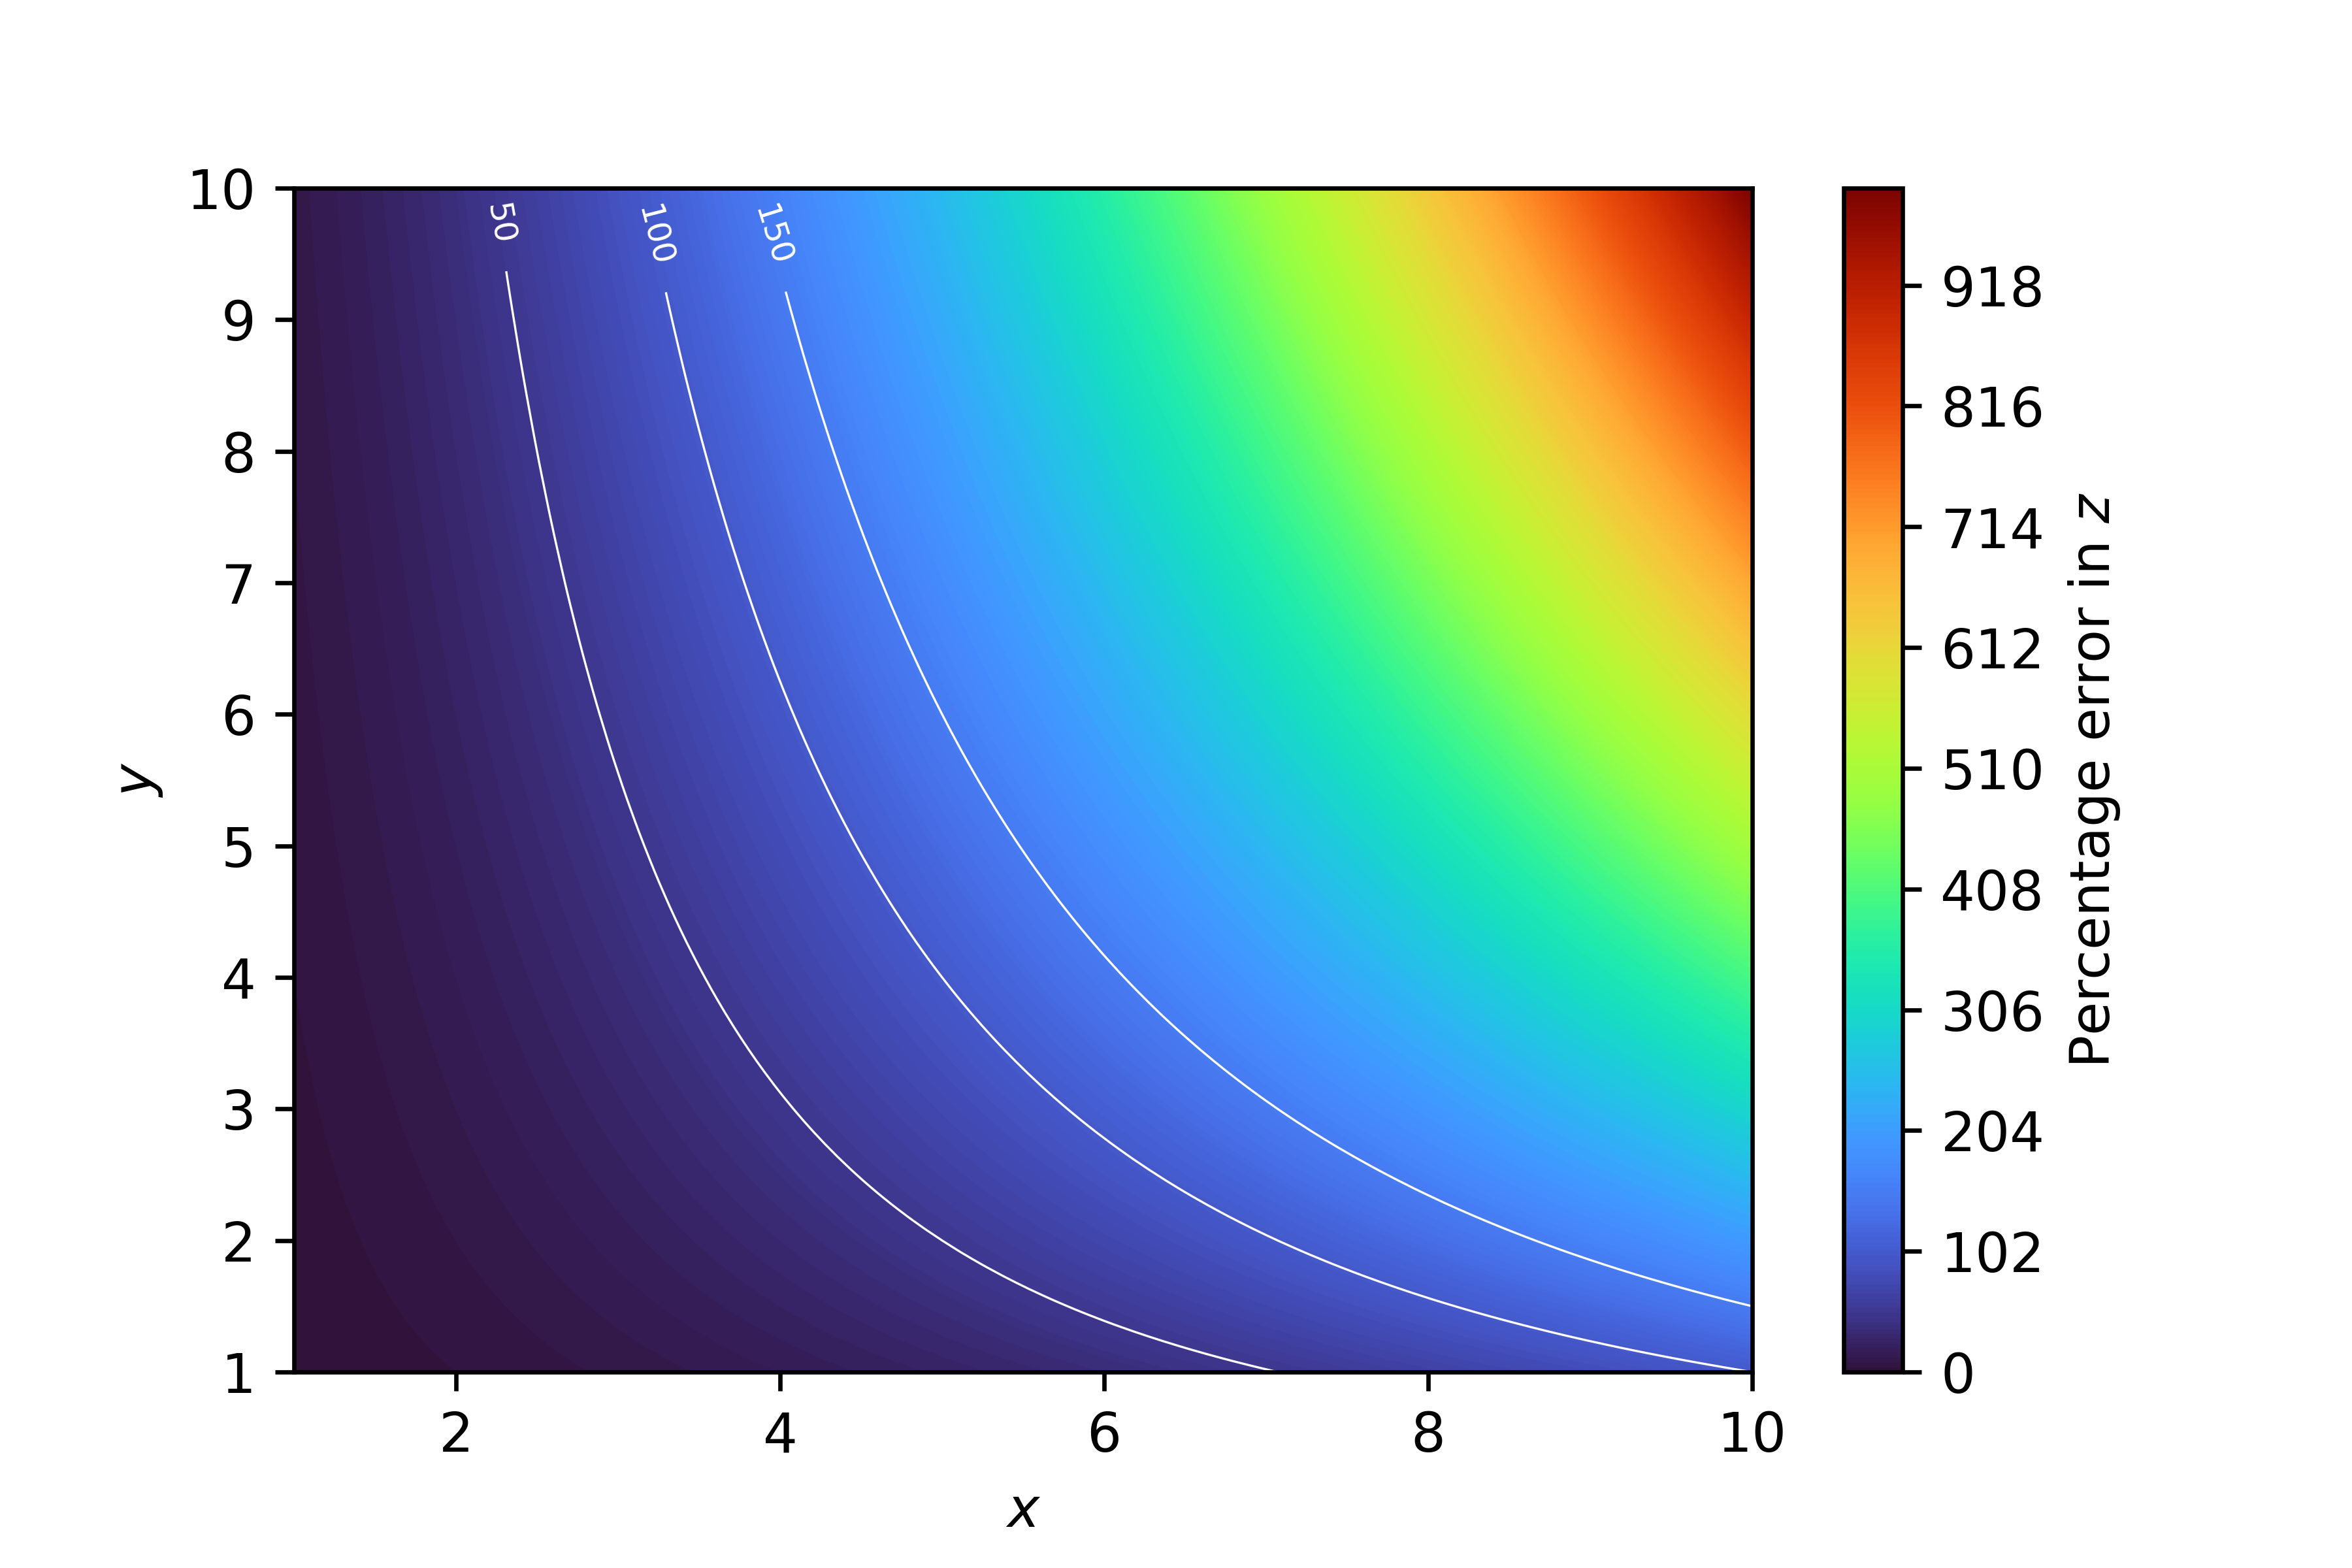

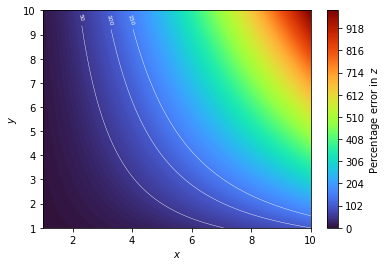

In [129]:
xRange = (1, 10)
yRange = (1, 10)
xDivisions = 100
yDivisions = 100
xLabel = '$x$'
yLabel = '$y$'
colourBarLabel = 'Percentage error in $z$'
contourLineLevels = [50, 100, 150]

def z(x, y):
    return x*(y**2)

graph = Graph(xRange, yRange, xDivisions, yDivisions, z)
display(graph.generate(xLabel, yLabel, colourBarLabel, contourLineLevels))